In [16]:
from os import listdir
from nbformat import read, NO_CONVERT

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size':20})

In [2]:
path = 'works/'
notebooks = [f for f in listdir(path) if f.endswith('.ipynb')]

In [3]:
notebooks


['student01.ipynb',
 'student02.ipynb',
 'student03.ipynb',
 'student04.ipynb',
 'student05.ipynb',
 'student06.ipynb',
 'student07.ipynb',
 'student08.ipynb',
 'student09.ipynb',
 'student10.ipynb',
 'student11.ipynb',
 'student12.ipynb',
 'student13.ipynb',
 'student14.ipynb',
 'student15.ipynb',
 'student16.ipynb',
 'student17.ipynb',
 'student18.ipynb']

In [4]:
works = {}

for filename in notebooks:
    print(filename)
    with open(path + filename, encoding='utf-8') as file:
        notebook = read(file, NO_CONVERT)
    
    cells = [c for c in notebook['cells'] if c['cell_type'] == 'code']
    code = [c['source'] for c in cells]
    works[filename] = set(code)
    #break

student01.ipynb
student02.ipynb
student03.ipynb
student04.ipynb
student05.ipynb
student06.ipynb
student07.ipynb
student08.ipynb
student09.ipynb
student10.ipynb
student11.ipynb
student12.ipynb
student13.ipynb
student14.ipynb
student15.ipynb
student16.ipynb
student17.ipynb
student18.ipynb


### Предобработка строк 

- Для удаления пробелов, пустых строк. 
- Для проверки на самую простую замену переменных
- Некоторые студенты просто меняют цвет отрисовки, остальной код остается прежним 

In [ ]:
# TODO

### Множество допустимых строк

Множество `legal` содержит допустимые строки, которые не будут считаться за плагиат

In [5]:
legal = set(['import numpy as np'])

### Плагиат

Все ноутбуки сравниваются друг с другом и считается количество одинаковых строк в пересечении множеств без допустимых строк $|N_i\cap N_j|-|N_i\cap N_j\cap Legal|$

In [6]:
n = len(notebooks)
m = np.zeros((n, n))

for i, fi in enumerate(notebooks):
    for j, fj in enumerate(notebooks):
        m[i, j] = len(works[fi].intersection(works[fj]))-len(works[fi].intersection(works[fj]).intersection(legal))
        
    m[i, i] = 0


### Сортировка и проверка

Сортировка студентов по наибольшему количеству заимствованных строк, чтобы в следующей ячейке оценить, действительно ли это плагиат или нужно исправить множество Legal

In [7]:
arg = np.argsort(-np.sum(m, axis=1))
arg 

array([12,  5, 17,  3,  6,  1, 14,  8, 10,  7,  4, 11, 13, 15,  0,  9, 16,
        2], dtype=int64)

In [8]:
for a in arg:
    line = m[a].copy()
    arg2 = np.argsort(-line)
    for j in arg2:
        if line[j] == 0:
            break
        print('Студент 1: ')
        print(notebooks[a])
        print('Студент 2: ')
        print(notebooks[j])
        print('Одинаковых строк кода: ', line[j])
        print('Код: ')
        print('\n'.join(works[notebooks[a]].difference(legal).intersection(works[notebooks[j]])))

Студент 1: 
student13.ipynb
Студент 2: 
student06.ipynb
Одинаковых строк кода:  21.0
Код: 
a = np.arange(0, 125, 1).reshape(5, 5, 5)
a[::2, 1:4, 1::3, ]
import random
dots = np.random.sample((100, 2))*100
ranges = np.linalg.norm(dots, ord = 2, axis=1)
minn = np.argmin(ranges)
maxx = np.argmax(ranges)
print(dots[minn], dots[maxx])
a = np.arange(0, 400, 1).reshape(20, 20)
a[(((a % 20)**2 + (a // 20)**2)**0.5) <= 16]
a = np.arange(0, 36, 1).reshape(6, 6)
a[1:5, 1:5]
arr = np.loadtxt('signal.txt')
original = np.fft.rfft(arr)
print(original)
repaired = np.fft.irfft(original)
plt.plot(repaired)
plt.plot(arr)

nodes = np.loadtxt('nodes.txt')
tris = np.loadtxt('triangles.txt')
true_value = 2
calculated = []
for n in np.arange(10, 1001, 1):
    xs = np.linspace(0, np.pi, n)
    integral = sum(np.sin(xs)) * np.pi / n
    calculated.append(integral)
calculated = np.array(calculated)
calculated = (1 -abs(calculated - true_value)/true_value)
plt.plot(np.arange(10, 1001, 1), calculated)
pts = np.ran

In [20]:
names = [n[:-6] for n in notebooks]

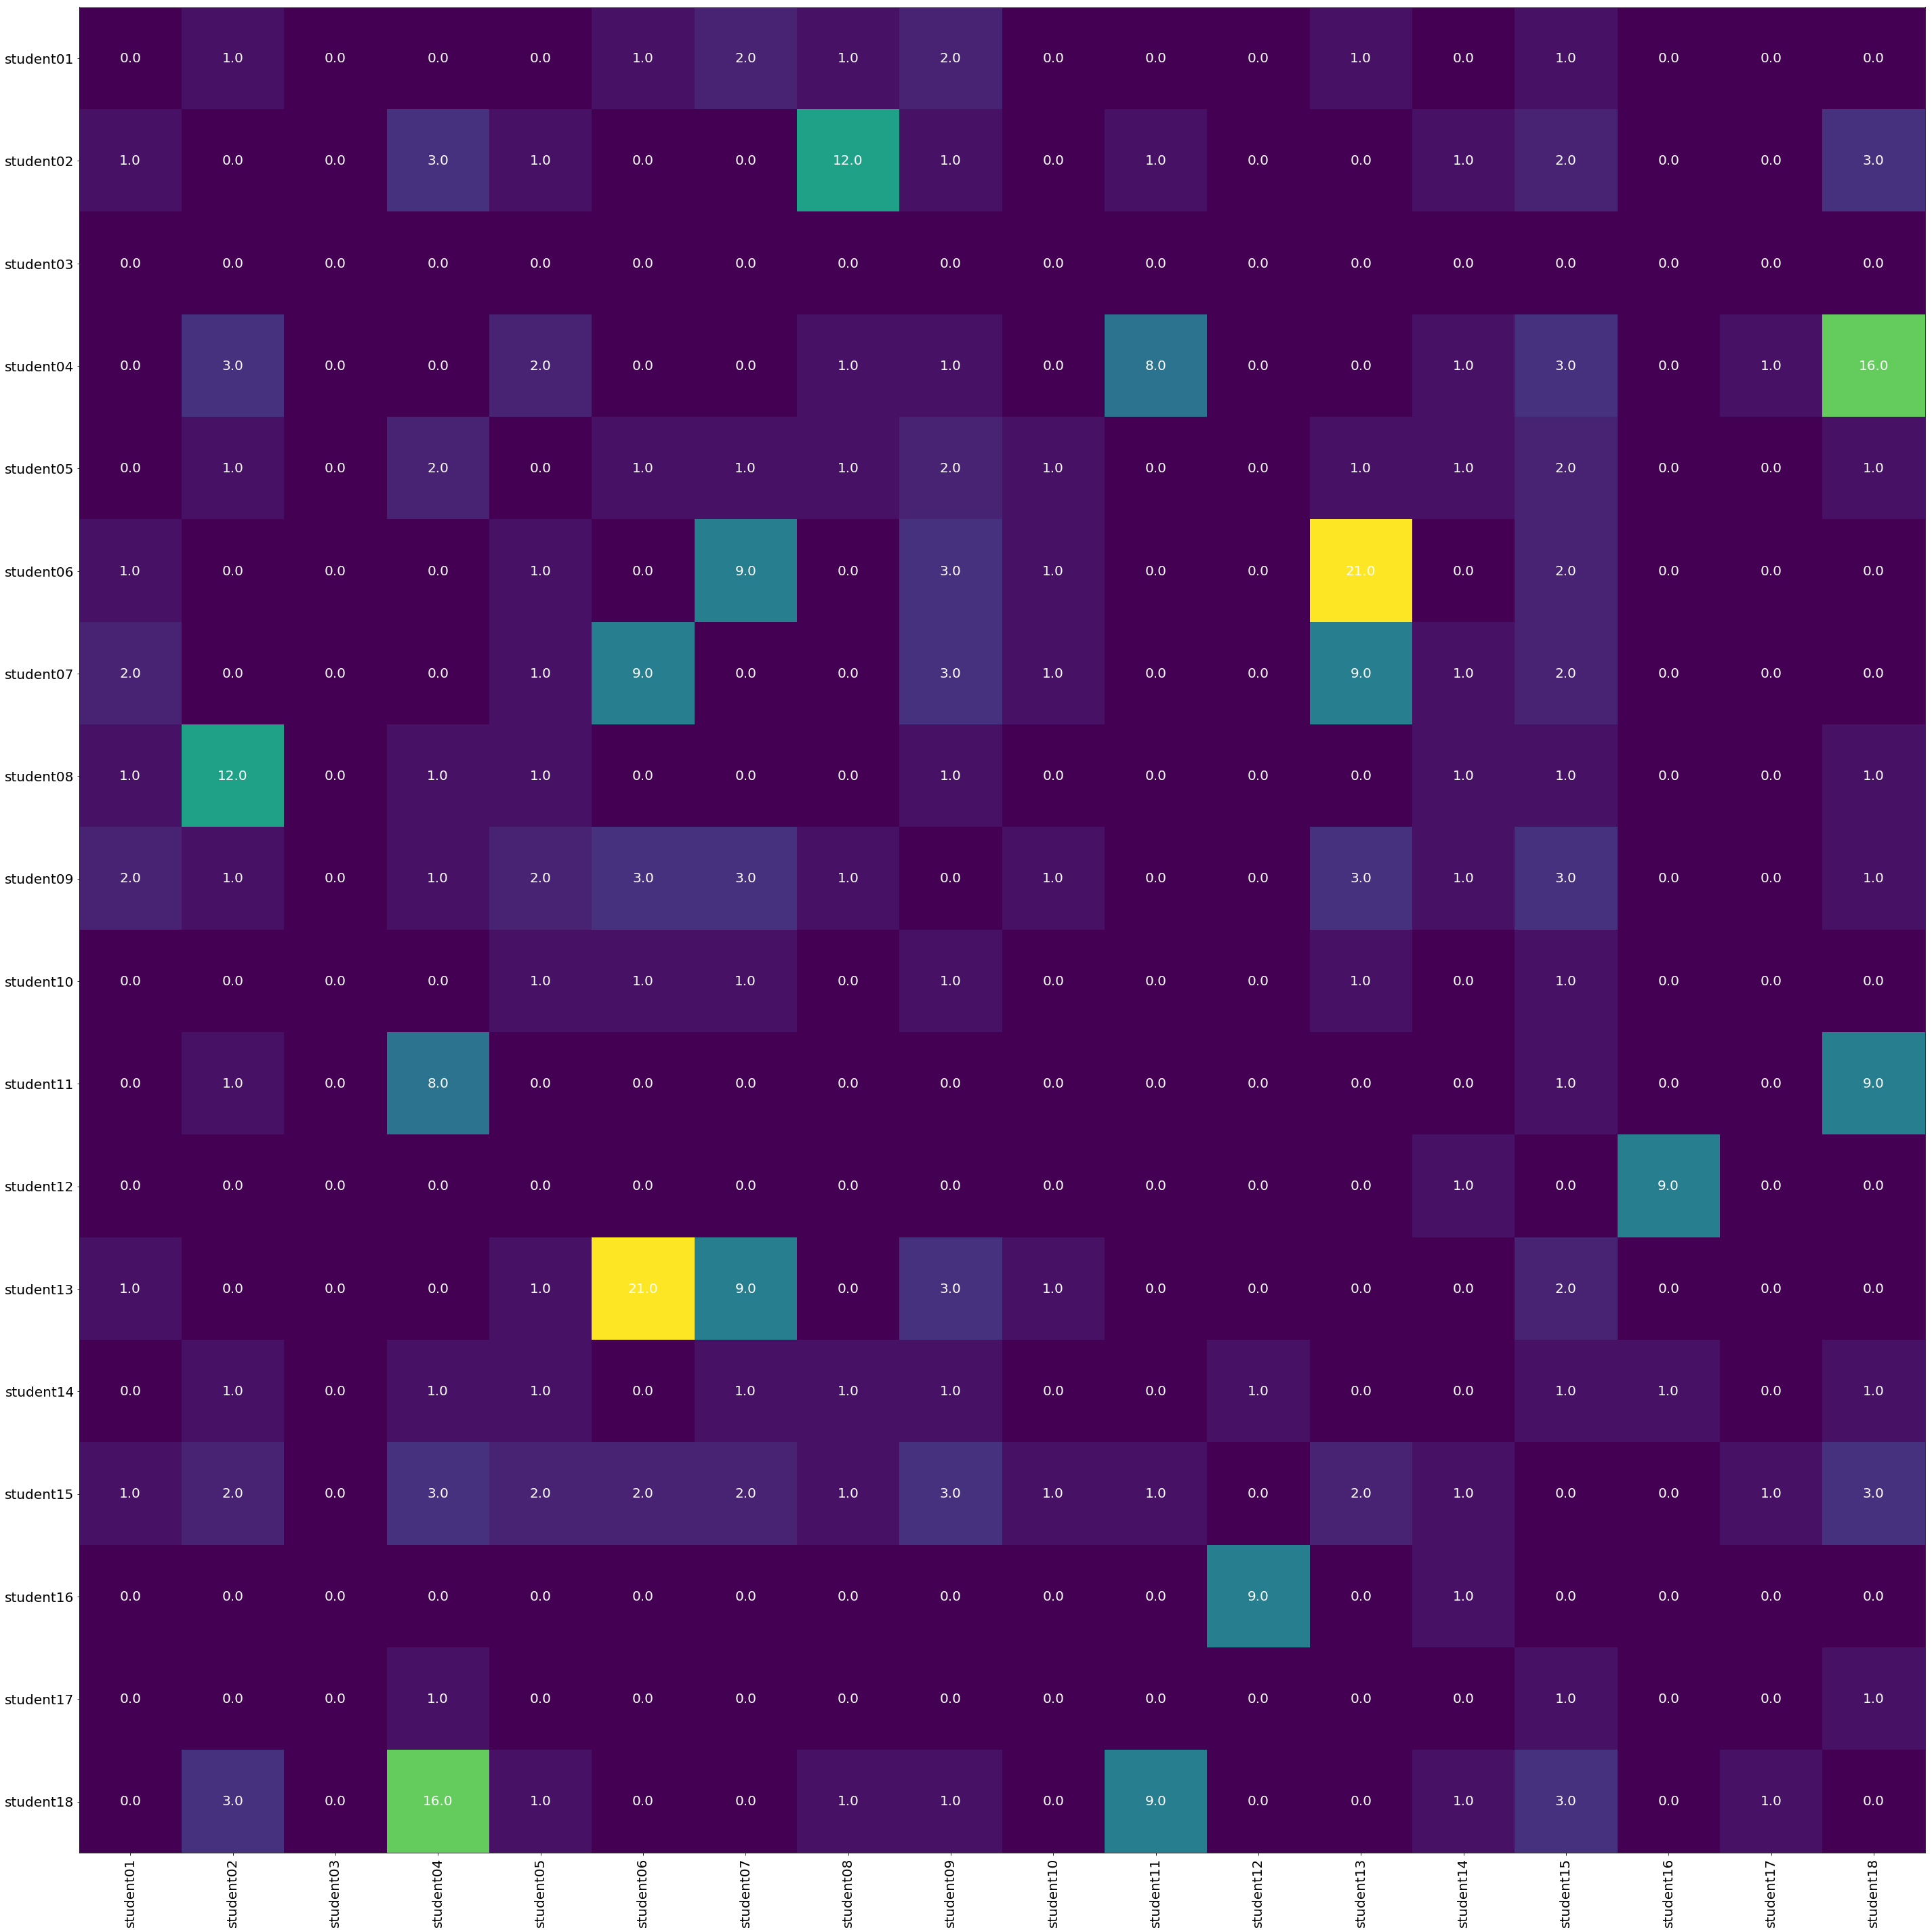

In [23]:
fig, ax = plt.subplots(figsize=(40,40))

ax.imshow(m)
ax.set_xticks(list(range(n)));
ax.set_yticks(list(range(n)));

ax.set_xticklabels(names, rotation=90);
ax.set_yticklabels(names);


for i in range(n):
    for j in range(n):
        text = ax.text(j, i, m[i, j],
                       ha="center", va="center", color="w")

fig.tight_layout()        
fig.savefig('numpy.png', dpi=300)
